# Lecture 2: Supervised Learning

COMP 3921F \
Applied Machine Learning \
Mon 4:40 PM - 5:55 PM \
Tue: 5:00 PM - 6:15 PM

Professor: __Ramesh Natarajan__ \
Email: **ramesh.natarajan@yu.edu** \
Department of Computer Science \
Stern College and Yeshiva University

Date: Jan 24, 2024



## Acknowledgements

1. The starting point for developing the notebook-based instruction material was the set of notebooks provided by the previous  course instructor__[Prof. Zach Glassman](https://www.linkedin.com/in/zachary-glassman-7088844b/)__.
2. These notebooks have been augmented by similar instruction material taken from many, many other sources, including official documentation from many ML libraries and frameworks. I have adapted and modified the content where needed to make it compatible with student level, orientation and proficiency in this course.
3. The primary addition sources include:
   1. Course content from V. Kuleshov, Cornell Tech __[repo](https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)__.
   2. Book and support material from Hal Daume II, __[A course in Machine Learning](http://ciml.info)__. __[repo](https://github.com/hal3/ciml/)__
   3. Book and support material from A. Geron, __[Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow (3rd edition)](https://homl.info/er3)__. __[repo](https://github.com/ageron/handson-ml3/blob/main/README.md)__




# Announcements

1. Problem Set 1 in progress.
2.  Recitations will review __[pandas](https://github.com/ageron/handson-ml3/blob/main/tools_pandas.ipynb)__.Recitations will review __[differential calculus](https://github.com/ageron/handson-ml2/blob/master/math_differential_calculus.ipynb)__ and __[linear algebra](https://github.com/ageron/handson-ml2/blob/master/math_linear_algebra.ipynb)__.
3. You should continue  to review and refresh yourself on the mathematical prerequisites for applied machine learning from part 1 for Deisenroth, Faisal and Ong, __[Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)__.


# Definition of Supervised Learning

A machine learning problem has 3 ingredients:

+  A task **T** with an outcome **y** (e.g. - predict the user rating for any movie in the set of movies in a online database)
+  A set of training examples **E** with each example containing the  relevant context **X** for this task (e.g. viewer history, known preferences, movie attributes etc.), along with task outcome **y** (e.g.the  user rating observed in this context **X**).  
+ One or more performance metrics **P** for the task (e.g. - how accurate are the machine learning predictions?)

For supervised learning the task **T** usually involves predicting a label. Hence,  the experiences consist  of context-dependent labelled examples, and the performance metric **P** is the label prediction accuracy on unseen examples


# Mathematical Statement of Supervised Learning

We seek a model  $f_{\theta} : X → Y$ , where $X$ and $Y$ are input and output spaces respectively, and $\theta$ is a set of unknown model parameters, which are estimated from given a set of labeled training examples $\{x_i , y_i\}_{i=1}^n$ with each example consisting of inputs $x_i \in X$ and outputs $y_i \in Y$.

Examples:

$X$ may be the space of pixelated  images and $Y$ may be an object in the image
$X$ may be the space of movie reviews  and $Y$ may be the space of movie ratings
$X$ may be patient medical history and $Y$ may be the space of diagnosable illnesses
$X$ may be the space of history sequences and $Y$ may be the space of the next element of this sequence 




# Supervised Learning Dataset

A dataset for supervised learning consists of a set of  $n$ examples (e.g., $n$ rows or records).

Training data = $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$

Here $x^{(i)}$ denotes the individual input features for example  $i$, and each $y^{(i)} \in \mathcal{Y}$ is the corresponding target

Therefore, $(x^{(i)}, y^{(i)})$ is the $i$'th *example* in the training data. 

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a (transposed) $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1, 
x^{(i)}_2,
\ldots, x^{(i)}_d
\end{bmatrix}$$

Or equivalently:


Equivalently:

|Feature 1|Feature 2| $\ldots$| Feature d|target|
|:---:|:---:|:---:|:---:|:---:|
|$x_{0}^{(0)}$|$x_{1}^{(0)}$| $\ldots$|$x_{d}^{(0)}$|$y^{(0)}$|
|$x_{0}^{(1)}$|$x_{1}^{(1)}$| $\ldots$|$x_{d}^{(1)}$|$y^{(1)}$|
|$\vdots$|$\vdots$|$\ldots$|$\vdots$|$\vdots$|
|$x_{0}^{(n)}$|$x_{1}^{(n)}$| $\ldots$|$x_{d}^{(n)}$|$y^{(n)}$|


The set $\mathcal{X}$ is called the feature space. 

In supervised learning, the examples $\{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$ are usually assumed to be independent unless stated otherwise; therefore the order of the examples is not important, and the data may often be shuffled before modeling to avoid any model training bias from the initial or presented ordering

These concepts are illustrated using the diabetes data set from scikit-learn

In [13]:
#import libraries and set defaults

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

## Load diabetes dataset and print the metadata

In [14]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# Input and Target features

As can be seen this data set consists of input (or raw) features, and corresponding targets.  Occasionally the input data may have already undergone some pre-processing and data cleaning, but most often these steps may have to be performed before any machine learning is possible

In [15]:

diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
print("Input and target Features")
display(pd.concat([diabetes_X, diabetes_y], axis=1).head())



Input and target Features


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [16]:
# Let see the feature space for patient i = 0 and i = 10 (note that these are pre-normalized to have mean 0, sd = 1)

for i in [0,10]:
    print(f"patient {i} features:\n  {diabetes_X.iloc[i].to_frame().T}\n\n")


patient 0 features:
          age      sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.05068  0.061696  0.021872 -0.044223 -0.034821 -0.043401   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  


patient 10 features:
           age       sex       bmi        bp        s1        s2        s3  \
10 -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   

          s4        s5        s6  
10 -0.076395 -0.062917 -0.034215  




# Features: Discrete vs. Continuous 

Features can be either discrete (values in an unordered finite set, e.g. gender)  or continuous (numerical either integer or real)

Note that sex in this dataset has been coded as a continuous feature (which is generally not an issue if the feature is binary, but would be incorrect for a multivalued discrete feature).

Its always a great idea to  plot the univariate distributions of each feature, and the computation time can be reduced by sampling the data set if it is too large.

Note that for this data set the input features appear to have been pre-normalized to mean 0 and std dev 1 (as already mentioned in the metadata prinited above).  



# Data Preparation


<ul>
<li>Preprocessing</li>
    <ul>
    <li>Data quality and anomalous values missing data imputation </li>
    <li>Missing data imputation </li>
    <li>Normalization</li>
    <li>Binning </li>
    <li>One-hot encoding</li>
    <li>Helmert and Orthogonal Polynomial coding</li>
    <li>Categorical clustering (zip codes)</li>
    <li>High-dimensional/sparse embeddings (text)</li>
    </ul>
<li>Feature elimination</li>
    <ul>
    <li>Information gain and partial info gain</li>
    <li>Correlation and partial correlation</li>
    </ul>
<li>Feature Leakage</li>
<li>Feature Anomaly Detection</li>
<li>Unbalanced Datasets</li>
<li>Positive-only targets</li>
</ul>

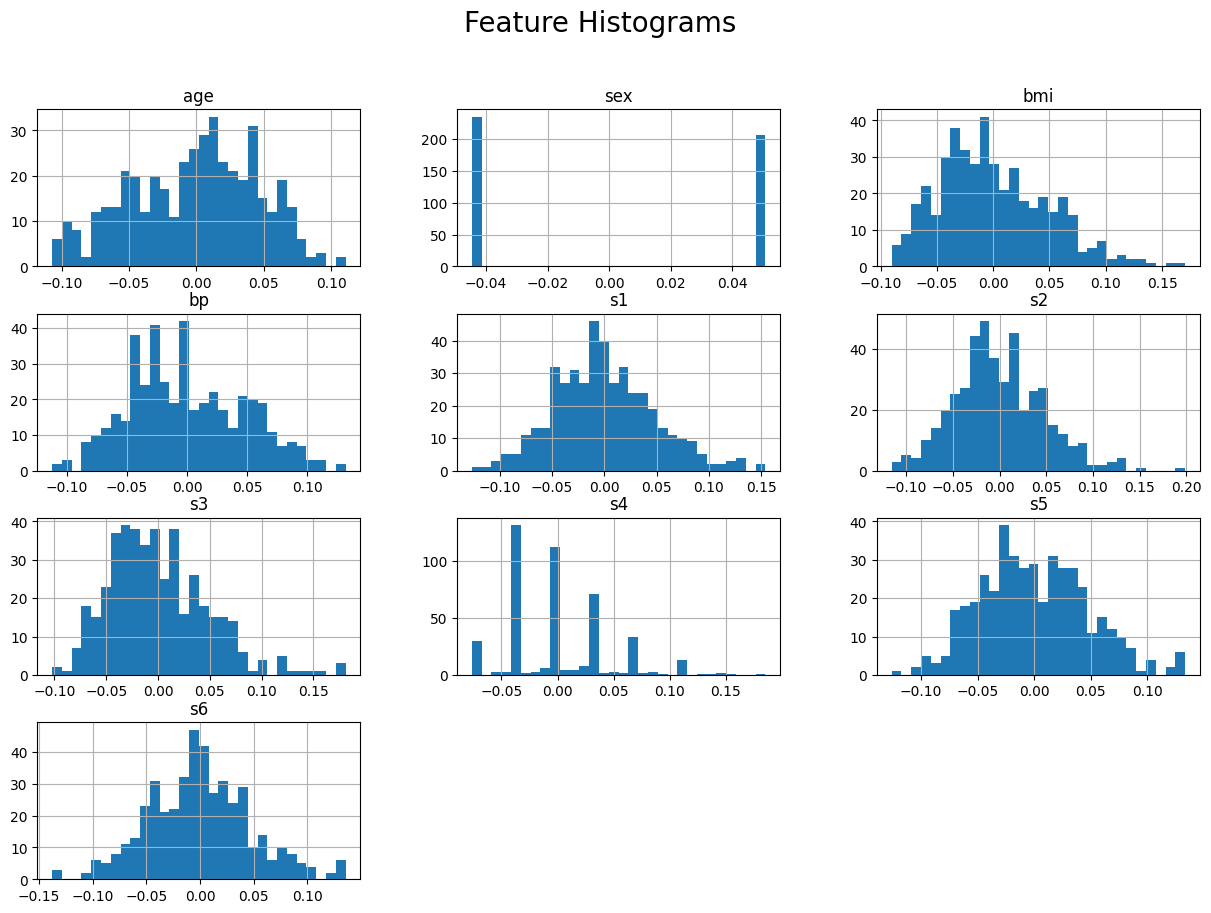

In [17]:
diabetes_X.hist( bins=30, figsize=(15, 10))
plt.suptitle("Feature Histograms", fontsize = 20)
plt.show()

# Training Dataset: Creating derived features

We can transform the existing feature in various ways to create new **derived features** (as opposed to the original raw or input features provided in the dataset. 

These derived features may only involve a single input features, but more generally they can involve multiple input features such as the case described below, where we introduce a flag for risky patients (here "older females" and "high BMI older male")

* Is the patient old and female? (e.g. useful if female are somehow at risk).
* Is the patient old, male, with BMI above the  threshold? (e.g. useful if high BMI males are somehow at risk)


In [18]:
diabetes_X['at-risk female'] = (diabetes_X['sex'] < 0) & (diabetes_X['age'] > 0.05)
diabetes_X['at-risk male'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05) & (diabetes_X['bmi'] > 0.05)
diabetes_X[['age','sex', 'at-risk female', 'at-risk male']].head()

,age,sex,at-risk female,at-risk male
0,0.038076,0.050680,False,False
1,-0.001882,-0.044642,False,False
2,0.085299,0.050680,False,False
3,-0.089063,-0.044642,False,False
4,0.005383,-0.044642,False,False


# Plotting the distribution of the target variable

It is helpful to plot the target variable to see if there are any outliers, and to understand if it is discrete or continuous

<Axes: xlabel='Diabetes risk score', ylabel='Number of patients'>

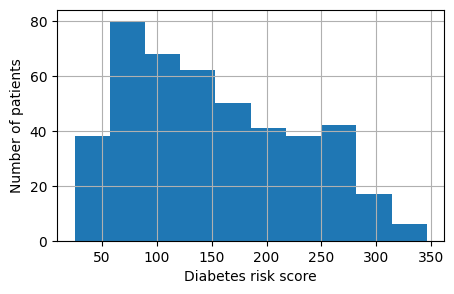

In [19]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist(figsize = (5,3))

# Splitting data into training and test datasets

In general, we should also use a completely unseen validation data set that is only used after all the model training and evaluation steps are completed.


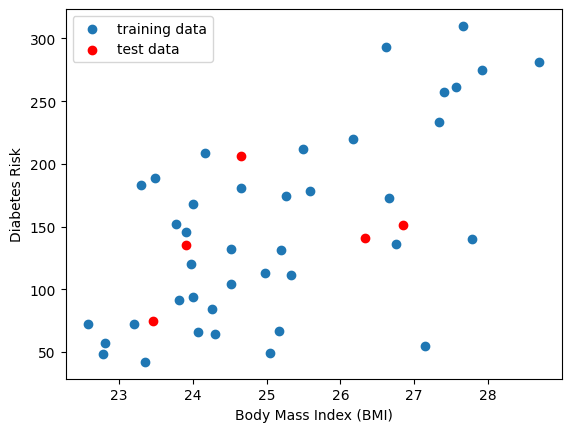

In [20]:
# Use only the BMI feature
diabetes_X = diabetes_X.loc[:, ['bmi']]

# The BMI is zero-centered and normalized; we unnormalize it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

n_train = 40
# Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-n_train :]
diabetes_y_train = diabetes_y.iloc[-n_train :]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

n_test = 5
# Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:n_test]
diabetes_y_test = diabetes_y.iloc[:n_test]

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['training data', 'test data'])

# Targets: Regression vs. Classification

Supervised learning algorithms differ in the form of the target variable.

1. __Regression__: The target variable $y$ is continuous and we are trying to predict its value  
2. __Classification__: The target variable $y$ is discrete. Each discrete value is a distinct *class* and we are trying to predict the class


# Examples of Supervised Learning Methods

<table><tr>
</td width="30%">
    <td><center>
        <img src="./img/Lecture-02/supervised-learning-creative.png"/>    
    </center>
    Generated by Chat-GPT 
     </td>  
    <td>
<ul>
<font size = "+1">
<li>Decision Trees</li>
<li>Linear Models</li>
<li>Discriminant Analysis</li>
<li>Kernel Regression</li>
<li>Support Vector Machines</li>
<li>Nearest Neighbors</li>
<li>Gaussian Processes</li>
<li>Ensembles (Boosting, Bagging, Random Forests)</li>
<li>Neural Networks</li>
</fontsize>font>
</ul>

</tr></table> 

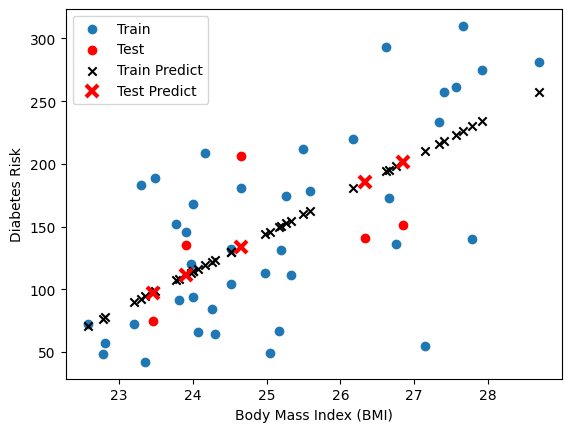

Training set mean squared error: 3232.31
Test set mean squared error: 2148.37


In [24]:
# fit a continous target using linear regression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# generate predictions on the test set
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# visualize the results

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train)
plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test, color='red', marker='o')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_pred, marker='x',color='black')
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend([ 'Train', 'Test', 'Train Predict', 'Test Predict',])
plt.show()

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))


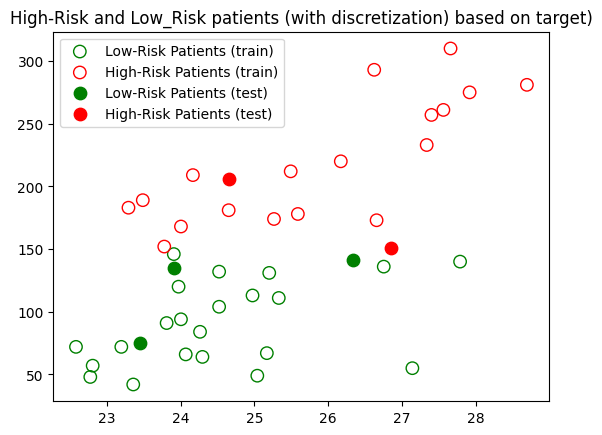

In [25]:
# Discretize the targets in 2 bins low (0), high(1)
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150]) # splits values at threshold 150
diabetes_y_test_discr = np.digitize(diabetes_y_test, bins=[150]) # splits values at threshold 150

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=80, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=80, facecolors='none', edgecolors='r')
plt.scatter(diabetes_X_test[diabetes_y_test_discr==0], diabetes_y_test[diabetes_y_test_discr==0], marker='o', s=80, facecolors='g', edgecolors='g')
plt.scatter(diabetes_X_test[diabetes_y_test_discr==1], diabetes_y_test[diabetes_y_test_discr==1], marker='o', s=80, facecolors='r', edgecolors='r')

plt.legend(['Low-Risk Patients (train)', 'High-Risk Patients (train)','Low-Risk Patients (test)', 'High-Risk Patients (test)'])
plt.title('High-Risk and Low_Risk patients (with discretization) based on target)')
plt.show()

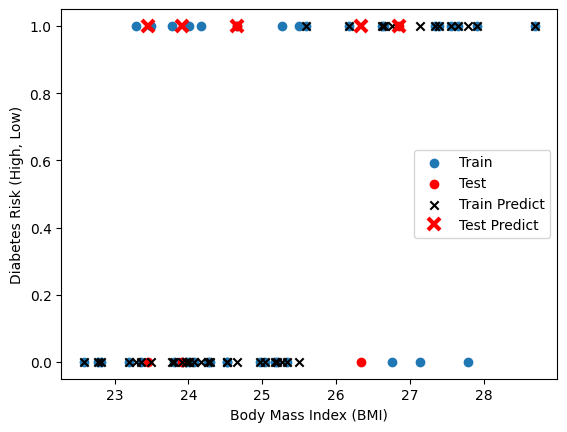

Training set mean squared error: 0.28
Test set mean squared error: 0.60
Training set mean absolute error: 0.28
Test set mean absolute error: 0.60


In [26]:
# Create linear regression object for the discretized data
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(diabetes_X_train, diabetes_y_train_discr)

# Make predictions on the training set
diabetes_y_train_discr_pred = np.digitize(regr2.predict(diabetes_X_train), bins=[0.5])

# # generate predictions on the test set
diabetes_y_test_discr_pred = np.digitize(regr.predict(diabetes_X_test), bins=[0.5])

# visualize the results

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk (High, Low)')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_discr, marker='o')
plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_discr, marker='o', color='red')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_discr_pred, color='black', marker='x')
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_discr_pred, 'x', color='red', mew=3, markersize=8)

plt.legend(['Train', 'Test', 'Train Predict', 'Test Predict'])
plt.show()

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train_discr, diabetes_y_train_discr_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test_discr, diabetes_y_test_discr_pred))

# this is the same as the average number of misclassifications

print('Training set mean absolute error: %.2f'
      % mean_absolute_error(diabetes_y_train_discr, diabetes_y_train_discr_pred))
print('Test set mean absolute error: %.2f'
      % mean_absolute_error(diabetes_y_test_discr, diabetes_y_test_discr_pred))

# Model Perfomance Metrics

<ul>
<li>Classification metrics</li>
    <ul>
    <li>Binary and Multiclass accuracy </li>
    <li>Confusion Matrix</li>
    <li>Gain Charts, ROC, AUC.</li>
    <li>Model calibration metrics</li>
    </ul>        
<li>Regression metrics</li>
    <ul>
    <li>Absolute metrics (MSE, MAD)</li>
    <li>Relative metrics (MAPE)</li>
    <li>R-squared, Mallows Cp</li>
    </ul>  
<li>Ranking metrics</li>
    <ul> 
    <li>Precision at k</li>
    <li>Mean Reciprocal rank</li>
    <li>Normalized Discounted Cumulative Gain</li>
    <li>Spearman’s rank correlation</li>
    </ul>   
</ul>

# Issues in Supervised Learning

+ Can unlabeled data be used for unsupervised learning?
+ Can we transfer model details from one task to another related but different task?
What is the relationship between different learning algorithms and models?  How do we know which to use when?
+ How do we explain the model predictions? Global interpretability and per-example explainability.
+Can a learning algorithm also suggest where new example data must be collected to improve model quality - e.g. guided exploration?  
+ Can we have data privacy for sensitive data (e.g. healthcare, finance) without compromising model quality?


# Summary 
The primary application of supervised learning has been in prediction.  

In the past the structure of the models was of little importance as long as the models performed well in practice.   More recently there is quite a bit of interest in **model explainability** (for the overall model, as well as for individual model predictions).   

Finally, there is also considerable interest in understanding the reliability and robustness of individual predictions (termed **uncertainty quantification**).  For individual predictions this is determined by the nature of the response function, as well as by the amount of training data that the model has access to in the relevant parts of the input data space.